# Easy Patch Sampling

DESCRIPTION: This code extracts patches from a histology slide image  
INPUT: a folder of images  
OUTPUT:  
1) `all_images` : a dictionary of patches by file  
2) `OUT_DIR/%s` : a folder full of patches, arranged by original image  

Note: Level count is going to tell you how far you can zoom the image. I'm taking the highest amount you can zoom the image, then extracting patches

In [1]:
import openslide
import os
import import_ipynb
import matplotlib.pyplot as plt
from tqdm import tqdm
from patch_functions import extract_patches, determine_quality, pad

importing Jupyter notebook from patch_functions.ipynb


**User-adjusted Hyperparameters:**

In [2]:
FILETYPE = '.svs' # file extension of histology slides
FILE_DIR = 'images' # location of files (all images should be in one folder)
OUT_DIR = 'patches' # name of output folder
TILE_SIZE = 1000 # pixel size of image
WHITESPACE_CUTOFF = 0.35 # how much whitespace will you allow: [0, 1]

## Run Code

In [3]:
# extract all histology slides in FILE_DIR
files = os.listdir(FILE_DIR)
files = [x for x in files if FILETYPE in x]

In [ ]:
# extract patches and remove ones with too much whitespace
all_images = {}
for file in files:
    m = openslide.OpenSlide('%s/%s' % (FILE_DIR, file))
    print(file, '| Image size:', m.dimensions)
    
    print('* Extracting patches...')
    d = extract_patches(m, TILE_SIZE)
    
    print('* Removing patches with too much whitespace...')
    all_images[file] = []
    for img in tqdm(d):
        if determine_quality(img, WHITESPACE_CUTOFF):
            all_images[file].append(img)

test.svs | Image size: (46000, 32893)
* Extracting patches...


In [5]:
# find amount of patches per image
for key in all_images:
    print(key, ':', len(all_images[key]))

test.svs : 265


## Save patches to image

In [6]:
# check for OUT_DIR
try:
    os.listdir(OUT_DIR)
except:
    os.mkdir(OUT_DIR)

for key in all_images:
    os.mkdir('%s/%s' % (OUT_DIR, key[:-4]))
    i = 0
    
    for img in all_images[key]:
        name = 'patch' + pad(i,len(str(len(all_images[key]))))
        img.save('%s/%s/%s.png' % (OUT_DIR, key[:-4], name),'PNG')
        i += 1

## Visualize

See first 100 accepted images

In [7]:
filename = files[0]

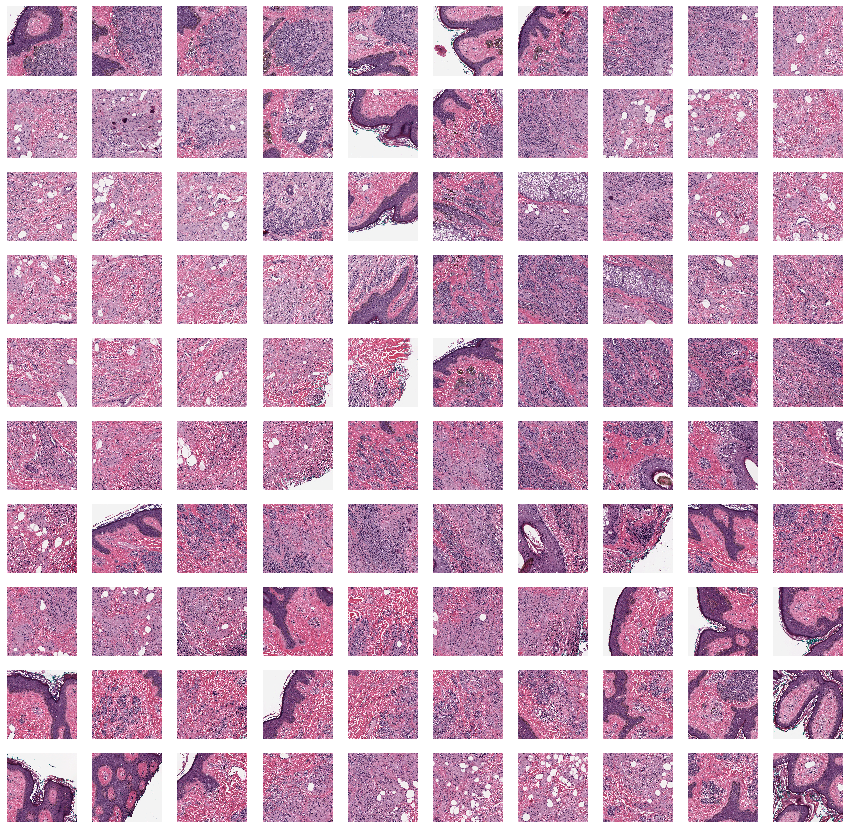

In [10]:
fig, axes = plt.subplots(10,10, figsize=(15,15) )
tot = 0

l = len(all_images[filename])

for i in range(10):
    for j in range(10):
        axes[i,j].imshow(all_images[filename][tot])
        axes[i,j].axis('off')
        tot += 1
    if tot >= l:
        break
plt.show()